<a href="https://colab.research.google.com/github/segnig/Tanzania-Tourism-Prediction/blob/main/last_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
FILE_PATH = "/content/drive/MyDrive/Data Science/Tanzania Tourism Prediction/"

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt


In [ ]:
train = pd.read_csv(FILE_PATH + "Train.csv")
test = pd.read_csv(FILE_PATH + "Test.csv")
sub = pd.read_csv(FILE_PATH + "SampleSubmission.csv")

In [ ]:
train_copy = train.copy()
test_copy = test.copy()
print(train_copy.shape, test_copy.shape)

(4809, 23) (1601, 22)


In [ ]:
train_test_df = pd.concat([train_copy, test_copy])

In [ ]:
train_test_df.shape

(6410, 23)

In [ ]:
# Data Info
train_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6410 entries, 0 to 1600
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     6410 non-null   object 
 1   country                6410 non-null   object 
 2   age_group              6410 non-null   object 
 3   travel_with            4969 non-null   object 
 4   total_female           6406 non-null   float64
 5   total_male             6403 non-null   float64
 6   purpose                6410 non-null   object 
 7   main_activity          6410 non-null   object 
 8   info_source            6410 non-null   object 
 9   tour_arrangement       6410 non-null   object 
 10  package_transport_int  6410 non-null   object 
 11  package_accomodation   6410 non-null   object 
 12  package_food           6410 non-null   object 
 13  package_transport_tz   6410 non-null   object 
 14  package_sightseeing    6410 non-null   object 
 15  package_g

In [ ]:
[col for col in train_test_df.select_dtypes(include="object")]

['ID',
 'country',
 'age_group',
 'travel_with',
 'purpose',
 'main_activity',
 'info_source',
 'tour_arrangement',
 'package_transport_int',
 'package_accomodation',
 'package_food',
 'package_transport_tz',
 'package_sightseeing',
 'package_guided_tour',
 'package_insurance',
 'payment_mode',
 'first_trip_tz',
 'most_impressing']

In [ ]:
[col for col in train_test_df.select_dtypes(include="number")]

['total_female',
 'total_male',
 'night_mainland',
 'night_zanzibar',
 'total_cost']

In [ ]:
[col for col in train_test_df.select_dtypes(include="category")]


[]

In [ ]:
train_test_df.isna().sum()

,0
ID,0
country,0
age_group,0
travel_with,1441
total_female,4
total_male,7
purpose,0
main_activity,0
info_source,0
tour_arrangement,0


In [ ]:
# Compute country averages for total_female and total_male
country_avg = train_test_df.groupby("country")[["total_female", "total_male"]].mean().fillna(0)

# Identify rows where both total_female and total_male are zero
mask = (train_test_df["total_female"] == 0) & (train_test_df["total_male"] == 0)

# Update the affected rows in train_test_df
train_test_df.loc[mask, "total_female"] = train_test_df.loc[mask, "country"].map(country_avg["total_female"])
train_test_df.loc[mask, "total_male"] = train_test_df.loc[mask, "country"].map(country_avg["total_male"])

# If applying similar logic to train, ensure the mask is recalculated for train
train_mask = (train["total_female"] == 0) & (train["total_male"] == 0)

train.loc[train_mask, "total_female"] = train.loc[train_mask, "country"].map(country_avg["total_female"])
train.loc[train_mask, "total_male"] = train.loc[train_mask, "country"].map(country_avg["total_male"])


In [ ]:
mask = train_test_df["travel_with"] == "Alone"
train_test_df.loc[mask, "total_male"] = 1
train_test_df.loc[mask, "total_female"] = 0

In [ ]:
train_test_df["total_female"] = train_test_df.groupby("main_activity")["total_female"].transform(lambda x: x.fillna(x.mean()))
train_test_df["total_male"] = train_test_df.groupby("main_activity")["total_male"].transform(lambda x: x.fillna(x.mean()))


train_test_df["total_people"] = train_test_df["total_female"] + train_test_df["total_male"]


In [ ]:
mask = train_test_df["total_people"] == 1.0
train_test_df.loc[mask, "travel_with"] = "Alone"

train_test_df["travel_with"] = train_test_df["travel_with"].fillna("Friends/Relatives")

In [ ]:
train_test_df["travel_with"].isnull().sum()

0

In [ ]:
train_test_df["most_impressing"] = train_test_df.groupby("travel_with")["most_impressing"].transform(lambda x: x.fillna(x.mode()[0]))

In [ ]:
train_test_df.isnull().sum()

,0
ID,0
country,0
age_group,0
travel_with,0
total_female,0
total_male,0
purpose,0
main_activity,0
info_source,0
tour_arrangement,0


In [ ]:
train_test_df[["total_female", "total_male", "total_people"]].describe()

,total_female,total_male,total_people
count,6410.000000,6410.000000,6410.000000
mean,0.826282,1.123527,1.949808
std,1.280734,1.132300,2.047621
min,0.000000,0.000000,1.000000
25%,0.000000,1.000000,1.000000
50%,1.000000,1.000000,2.000000
75%,1.000000,1.000000,2.000000
max,49.000000,44.000000,93.000000


In [ ]:
train_test_df.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,total_people
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5,2.0
1,tour_10,UNITED KINGDOM,25-44,Alone,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5,1.0
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0,1.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0,2.0
4,tour_1004,CHINA,1-24,Alone,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0,1.0


In [ ]:
train_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6410 entries, 0 to 1600
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     6410 non-null   object 
 1   country                6410 non-null   object 
 2   age_group              6410 non-null   object 
 3   travel_with            6410 non-null   object 
 4   total_female           6410 non-null   float64
 5   total_male             6410 non-null   float64
 6   purpose                6410 non-null   object 
 7   main_activity          6410 non-null   object 
 8   info_source            6410 non-null   object 
 9   tour_arrangement       6410 non-null   object 
 10  package_transport_int  6410 non-null   object 
 11  package_accomodation   6410 non-null   object 
 12  package_food           6410 non-null   object 
 13  package_transport_tz   6410 non-null   object 
 14  package_sightseeing    6410 non-null   object 
 15  package_g

## Package

In [ ]:
package_feature = [feature for feature in train_test_df.columns if "package" in feature]

In [ ]:
train_test_df[package_feature].head()

,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance
0,No,No,No,No,No,No,No
1,No,No,No,No,No,No,No
2,No,No,No,No,No,No,No
3,No,Yes,Yes,Yes,Yes,Yes,No
4,No,No,No,No,No,No,No


In [ ]:
map_package = {
    "Yes" : True,
    "No" : False
}

train_test_df[package_feature] = train_test_df[package_feature].replace(map_package)
train[package_feature] = train[package_feature].replace(map_package)


In [ ]:
train_test_df[package_feature].head()

,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,True,True,True,True,True,False
4,False,False,False,False,False,False,False


In [ ]:
train_test_df["tour_arrangement"]

,tour_arrangement
0,Independent
1,Independent
2,Independent
3,Package Tour
4,Independent
...,...
1596,Independent
1597,Package Tour
1598,Independent
1599,Independent


In [ ]:
map_package = {
    "Package Tour" : True,
    "Independent" : False
}


train_test_df["tour_arrangement"] = train_test_df["tour_arrangement"].map(map_package)
train["tour_arrangement"] = train["tour_arrangement"].map(map_package)

In [ ]:
# descride train
train_test_df.describe()

,total_female,total_male,night_mainland,night_zanzibar,total_cost,total_people
count,6410.000000,6410.000000,6410.000000,6410.000000,4.809000e+03,6410.000000
mean,0.826282,1.123527,8.551326,2.352106,8.114389e+06,1.949808
std,1.280734,1.132300,13.391914,4.818184,1.222490e+07,2.047621
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04,1.000000
25%,0.000000,1.000000,3.000000,0.000000,8.121750e+05,1.000000
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06,2.000000
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06,2.000000
max,49.000000,44.000000,664.000000,174.000000,9.953288e+07,93.000000


In [ ]:
# Describe categorical variables
categorical_summary = train_test_df[~ train_test_df["total_cost"].isna()].describe(include="object")

for col in categorical_summary.columns:
    print(f"Column: {col}")
    print(categorical_summary[col])
    print(f"Unique Count: {train_test_df[col].nunique()}")
    print(f"Unique Values: {train_test_df[col].unique()}")
    print()


Column: ID
count       4809
unique      4809
top       tour_0
freq           1
Name: ID, dtype: object
Unique Count: 6410
Unique Values: ['tour_0' 'tour_10' 'tour_1000' ... 'tour_992' 'tour_996' 'tour_998']

Column: country
count                         4809
unique                         105
top       UNITED STATES OF AMERICA
freq                           695
Name: country, dtype: object
Unique Count: 118
Unique Values: ['SWIZERLAND' 'UNITED KINGDOM' 'CHINA' 'SOUTH AFRICA'
 'UNITED STATES OF AMERICA' 'NIGERIA' 'INDIA' 'BRAZIL' 'CANADA' 'MALT'
 'MOZAMBIQUE' 'RWANDA' 'AUSTRIA' 'MYANMAR' 'GERMANY' 'KENYA' 'ALGERIA'
 'IRELAND' 'DENMARK' 'SPAIN' 'FRANCE' 'ITALY' 'EGYPT' 'QATAR' 'MALAWI'
 'JAPAN' 'SWEDEN' 'NETHERLANDS' 'UAE' 'UGANDA' 'AUSTRALIA' 'YEMEN'
 'NEW ZEALAND' 'BELGIUM' 'NORWAY' 'ZIMBABWE' 'ZAMBIA' 'CONGO' 'BURGARIA'
 'PAKISTAN' 'GREECE' 'MAURITIUS' 'DRC' 'OMAN' 'PORTUGAL' 'KOREA'
 'SWAZILAND' 'TUNISIA' 'KUWAIT' 'DOMINICA' 'ISRAEL' 'FINLAND'
 'CZECH REPUBLIC' 'UKRAIN' 'ETHIOPIA' 'B

## Country

In [ ]:
train_test_df["country"].unique()

array(['SWIZERLAND', 'UNITED KINGDOM', 'CHINA', 'SOUTH AFRICA',
       'UNITED STATES OF AMERICA', 'NIGERIA', 'INDIA', 'BRAZIL', 'CANADA',
       'MALT', 'MOZAMBIQUE', 'RWANDA', 'AUSTRIA', 'MYANMAR', 'GERMANY',
       'KENYA', 'ALGERIA', 'IRELAND', 'DENMARK', 'SPAIN', 'FRANCE',
       'ITALY', 'EGYPT', 'QATAR', 'MALAWI', 'JAPAN', 'SWEDEN',
       'NETHERLANDS', 'UAE', 'UGANDA', 'AUSTRALIA', 'YEMEN',
       'NEW ZEALAND', 'BELGIUM', 'NORWAY', 'ZIMBABWE', 'ZAMBIA', 'CONGO',
       'BURGARIA', 'PAKISTAN', 'GREECE', 'MAURITIUS', 'DRC', 'OMAN',
       'PORTUGAL', 'KOREA', 'SWAZILAND', 'TUNISIA', 'KUWAIT', 'DOMINICA',
       'ISRAEL', 'FINLAND', 'CZECH REPUBLIC', 'UKRAIN', 'ETHIOPIA',
       'BURUNDI', 'SCOTLAND', 'RUSSIA', 'GHANA', 'NIGER', 'MALAYSIA',
       'COLOMBIA', 'LUXEMBOURG', 'NEPAL', 'POLAND', 'SINGAPORE',
       'LITHUANIA', 'HUNGARY', 'INDONESIA', 'TURKEY', 'TRINIDAD TOBACCO',
       'IRAQ', 'SLOVENIA', 'UNITED ARAB EMIRATES', 'COMORO', 'SRI LANKA',
       'IRAN', 'MONTENEGRO', 

In [ ]:
# List of African countries
african_countries = set([
    'ALGERIA', 'ANGOLA', 'BENIN', 'BOTSWANA', 'BURKINA FASO', 'BURUNDI',
    'CAPE VERDE', 'CAMEROON', 'CENTRAL AFRICAN REPUBLIC', 'CHAD',
    'COMOROS', 'CONGO', 'DJIBOUTI', 'EGYPT', 'EQUATORIAL GUINEA',
    'ERITREA', 'ESWATINI', 'ETHIOPIA', 'GABON', 'GAMBIA', 'GHANA',
    'GUINEA', 'GUINEA-BISSAU', 'IVORY COAST', 'KENYA', 'LESOTHO',
    'LIBERIA', 'LIBYA', 'MADAGASCAR', 'MALAWI', 'MALI', 'MAURITANIA',
    'MAURITIUS', 'MOROCCO', 'MOZAMBIQUE', 'NAMIBIA', 'NIGER', 'NIGERIA',
    'RWANDA', 'SAO TOME AND PRINCIPE', 'SENEGAL', 'SEYCHELLES', 'SIERRA LEONE',
    'SOMALIA', 'SOUTH SUDAN', 'SUDAN', 'TANZANIA',
    'TOGO', 'TUNISIA', 'UGANDA', 'ZAMBIA', 'ZIMBABWE'
])

poorest_countries = [
    "BURUNDI","SOMALI","NIGER","MOZAMBIQUE","MALAWI","MADAGASCAR","ETHIOPIA","ZAMBIA",
    "LIBERIA","CONGO","SUDAN","DJIBOUT","HAITI","GUINEA","LESOTHO","SOUTH SUDAN","CHAD",
    "PAKISTAN","GAMBIA","MALI","NIGERIA","CAMEROON","SIERRA LEONE","UGANDA","TANZANIA","ZIMBABWE","BURKINA FASO",
    "BENIN","IVORY COAST""CENTRAL AFRICAN REPUBLIC","YEMEN","AFGHANISTAN",
]



train_test_df["african_country"] = train_test_df["country"].apply(lambda x: x in african_countries)
train_test_df["poorest_country"] = train_test_df["country"].apply(lambda x: x in poorest_countries)

In [ ]:
top_20_economies = [
    'UNITED STATES OF AMERICA', 'CHINA', 'JAPAN', 'GERMANY', 'INDIA',
    'UNITED KINGDOM', 'FRANCE', 'BRAZIL', 'ITALY', 'CANADA', 'RUSSIA',
    'SOUTH KOREA', 'AUSTRALIA', 'SPAIN', 'MEXICO', 'INDONESIA',
    'SAUDI ARABIA', 'TURKEY', 'NETHERLANDS', 'SWITZERLAND'
]

train_test_df["top_20_economies"] = train_test_df["country"].apply(lambda x: x in top_20_economies)
train["top_20_economies"] = train["country"].apply(lambda x: x in top_20_economies)

In [ ]:
train_test_df["african_country"].value_counts()

,count
african_country,
False,5014
True,1396


<Axes: xlabel='african_country'>

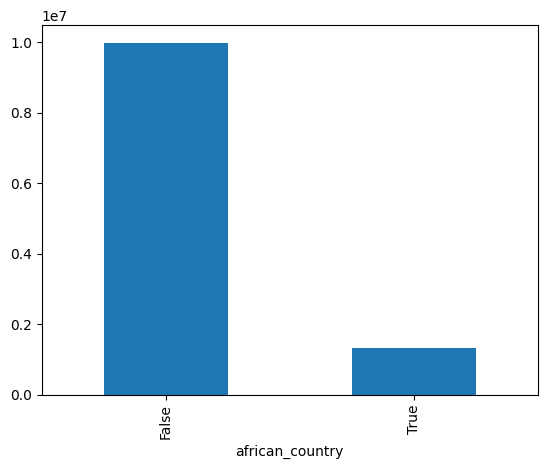

In [ ]:
# group by african country
train_test_df.groupby("african_country")["total_cost"].mean().plot(kind="bar")

<Axes: xlabel='top_20_economies'>

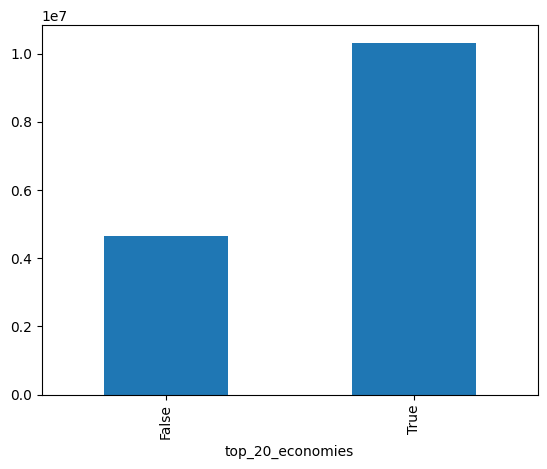

In [ ]:
train_test_df.groupby("top_20_economies")["total_cost"].mean().plot(kind="bar")

<Axes: title={'center': 'total_cost'}, xlabel='african_country'>

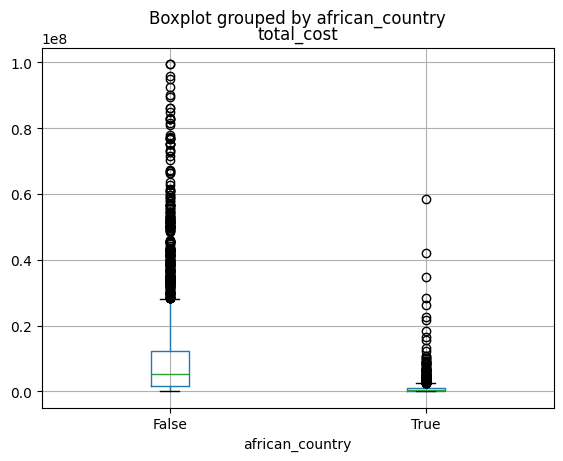

In [ ]:
# box plot for african_country
train_test_df.boxplot(column="total_cost", by="african_country")

<Axes: title={'center': 'total_cost'}, xlabel='top_20_economies'>

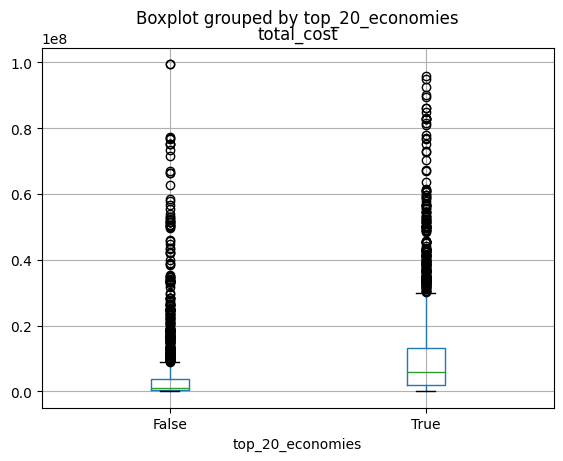

In [ ]:
train_test_df.boxplot(column="total_cost", by="top_20_economies")


<Axes: title={'center': 'total_cost'}, xlabel='poorest_country'>

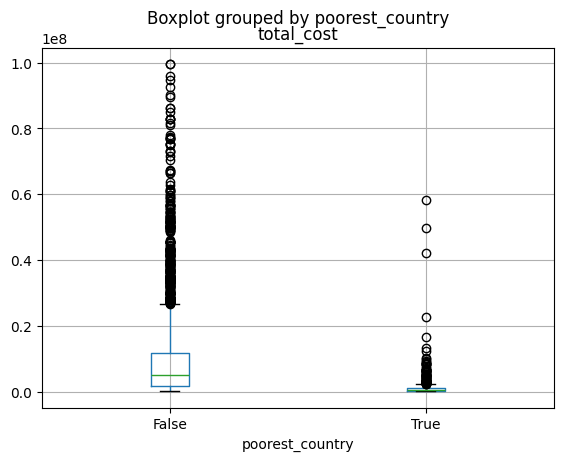

In [ ]:
train_test_df.boxplot(column="total_cost", by="poorest_country")


In [ ]:
train_test_df.groupby("african_country")["total_cost"].mean()

,total_cost
african_country,
False,9.986225e+06
True,1.339097e+06


In [ ]:
train_test_df.groupby("poorest_country")["total_cost"].mean()

,total_cost
poorest_country,
False,9.401262e+06
True,1.204478e+06


## Age group

In [ ]:
train_test_df["age_group"].unique()

array(['45-64', '25-44', '1-24', '65+', '24-Jan'], dtype=object)

In [ ]:
train_test_df["age_group"].value_counts()

,count
age_group,
25-44,3353
45-64,1838
1-24,624
65+,393
24-Jan,202


In [ ]:
test.age_group.value_counts()

,count
age_group,
25-44,866
45-64,447
24-Jan,202
65+,86


In [ ]:
train_test_df["age_group"] = train_test_df["age_group"].map({
    "24-Jan" : "1-24",
    "1-24": "1-24",
    "25-44": "25-44",
    "45-64": "45-64",
    "65+": "65+"
})

In [ ]:
train_test_df["age_group"].value_counts()


,count
age_group,
25-44,3353
45-64,1838
1-24,826
65+,393


<Axes: title={'center': 'total_cost'}, xlabel='age_group'>

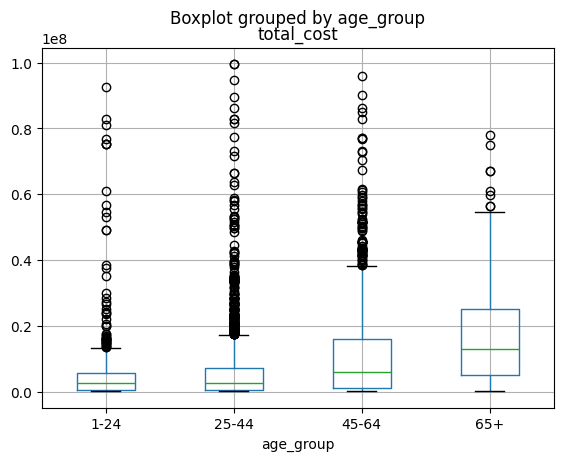

In [ ]:
# box plot for  age_group for train
train_test_df.boxplot(column="total_cost", by="age_group")

In [ ]:
train_test_df["oldest"] = train_test_df["age_group"].apply(lambda x: x == "65+")
train["oldest"] = train["age_group"].apply(lambda x: x == "65+")

In [ ]:
columns = train_test_df.columns.tolist()
columns


['ID',
 'country',
 'age_group',
 'travel_with',
 'total_female',
 'total_male',
 'purpose',
 'main_activity',
 'info_source',
 'tour_arrangement',
 'package_transport_int',
 'package_accomodation',
 'package_food',
 'package_transport_tz',
 'package_sightseeing',
 'package_guided_tour',
 'package_insurance',
 'night_mainland',
 'night_zanzibar',
 'payment_mode',
 'first_trip_tz',
 'most_impressing',
 'total_cost',
 'total_people',
 'african_country',
 'poorest_country',
 'top_20_economies',
 'oldest']

## payment mode


<Axes: xlabel='payment_mode', ylabel='count'>

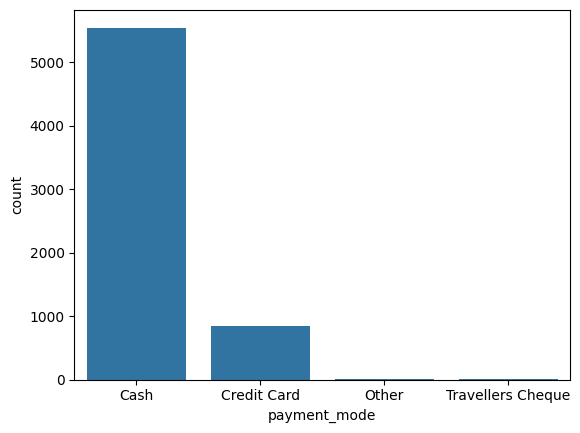

In [ ]:
sns.countplot(data=train_test_df, x="payment_mode")

<Axes: xlabel='payment_mode', ylabel='total_cost'>

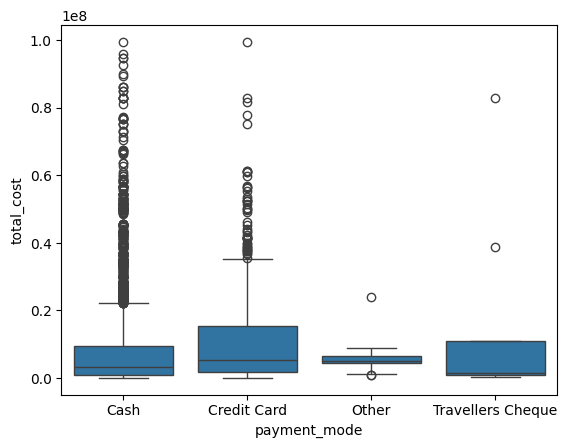

In [ ]:
sns.boxplot(data=train_test_df, x="payment_mode", y="total_cost")

In [ ]:
features_col = [
    'travel_with',
    'purpose',
    'main_activity',
    'info_source',
    'most_impressing',
]

In [ ]:
for col in features_col:
    print(train[col].value_counts())
    print()

travel_with
Alone                  1265
Spouse                 1005
Friends/Relatives       895
Spouse and Children     368
Children                162
Name: count, dtype: int64

purpose
Leisure and Holidays              2840
Business                           671
Visiting Friends and Relatives     633
Meetings and Conference            312
Volunteering                       138
Other                              128
Scientific and Academic             87
Name: count, dtype: int64

main_activity
Wildlife tourism            2259
Beach tourism               1025
Hunting tourism              457
Conference tourism           367
Cultural tourism             359
Mountain climbing            234
business                      58
Bird watching                 37
Diving and Sport Fishing      13
Name: count, dtype: int64

info_source
Travel, agent, tour operator      1913
Friends, relatives                1635
others                             490
Newspaper, magazines,brochures     359
Radio, 

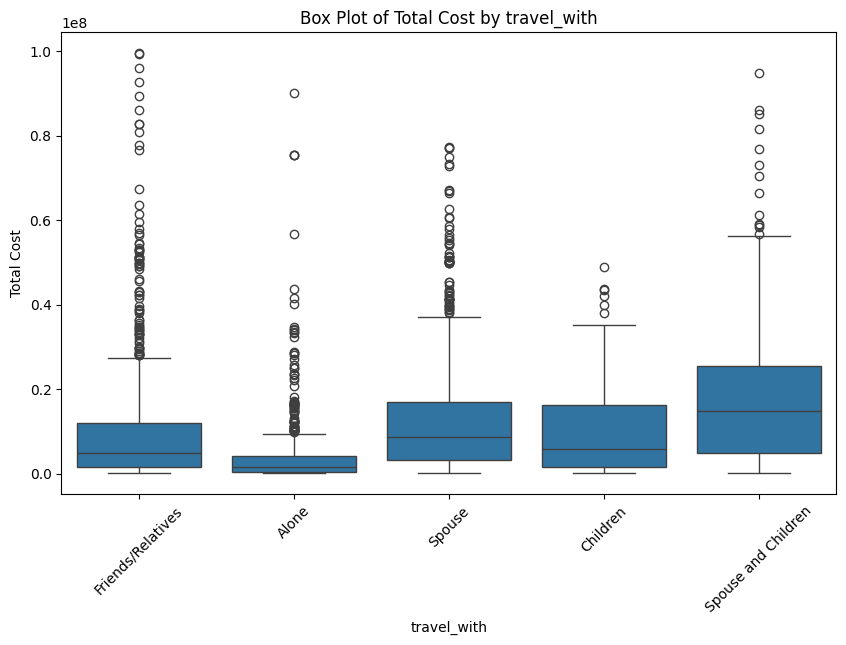

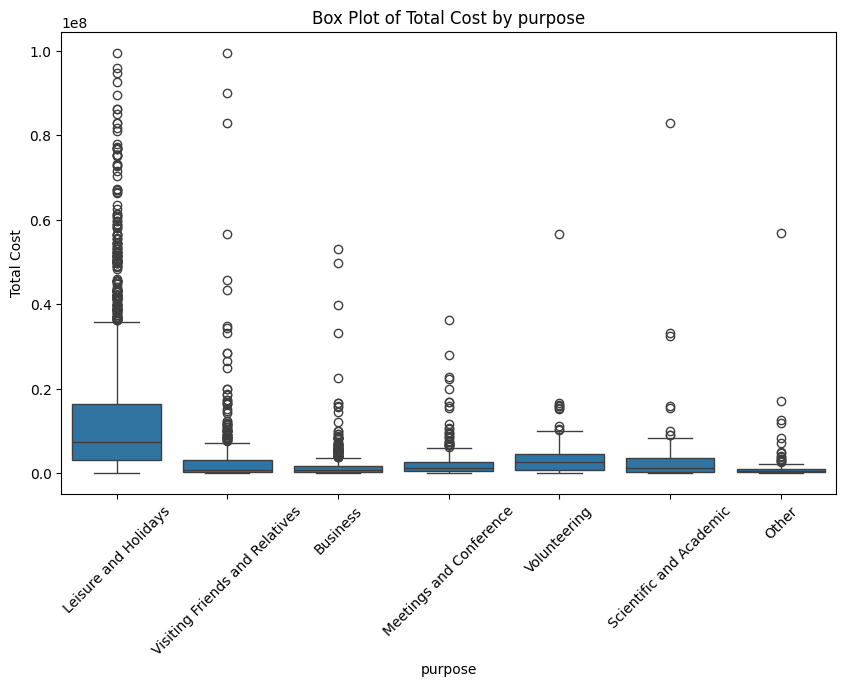

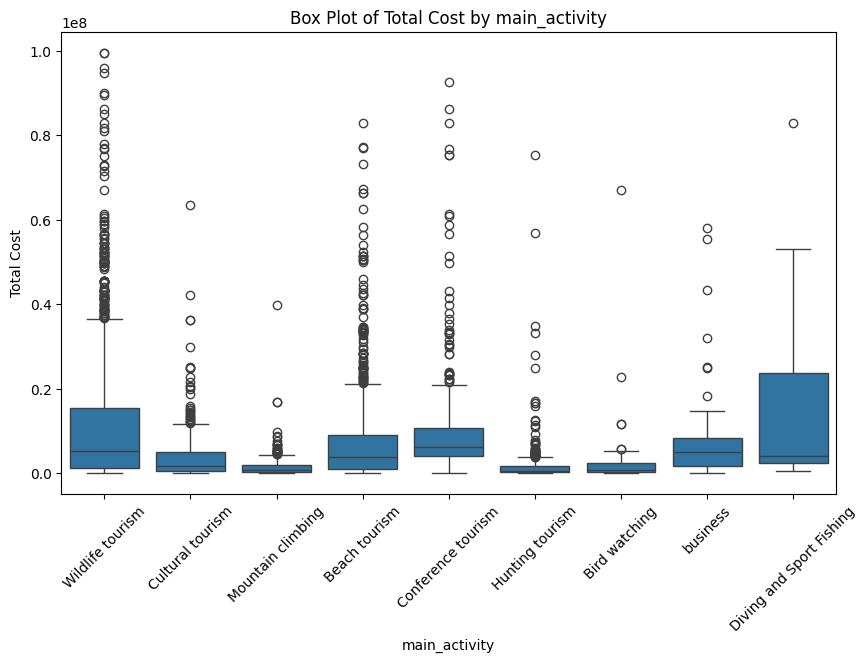

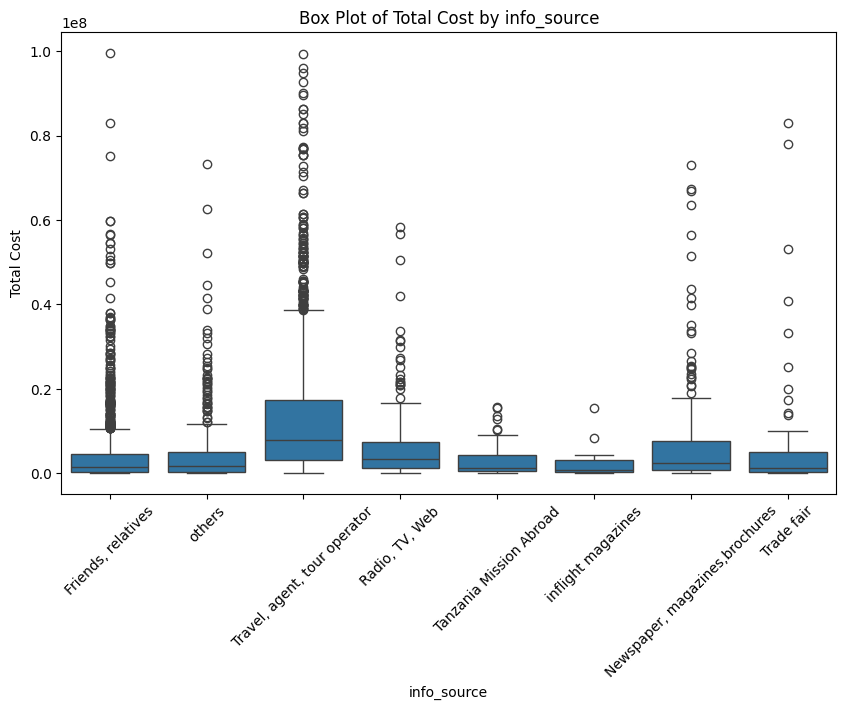

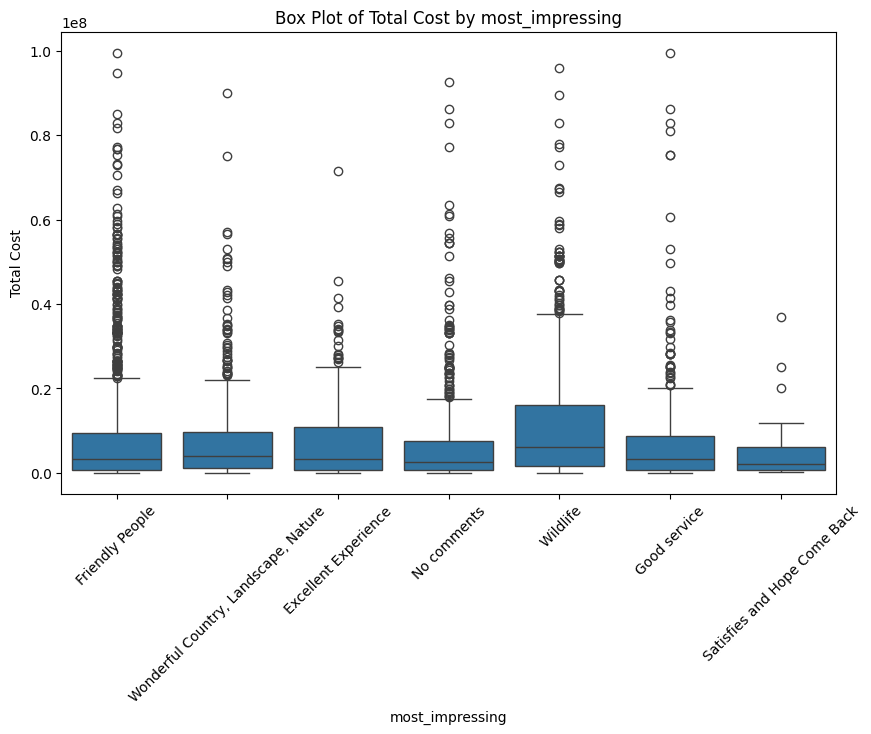

In [ ]:
for col in features_col:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=train, x=col, y="total_cost")
    plt.title(f"Box Plot of Total Cost by {col}")
    plt.xlabel(col)
    plt.ylabel("Total Cost")
    plt.xticks(rotation=45)
    plt.show()

#### purpose

In [ ]:
train_test_df["purpose"].value_counts()

,count
purpose,
Leisure and Holidays,3772
Business,913
Visiting Friends and Relatives,836
Meetings and Conference,419
Volunteering,183
Other,178
Scientific and Academic,109


In [ ]:
train_test_df["is_holidays"] = train_test_df["purpose"].apply(lambda x: x == "Leisure and Holidays")
train["is_holidays"] = train["purpose"].apply(lambda x: x == "Leisure and Holidays")

In [ ]:
train_test_df["is_holidays"].value_counts()

,count
is_holidays,
True,3772
False,2638


<Axes: title={'center': 'total_cost'}, xlabel='is_holidays'>

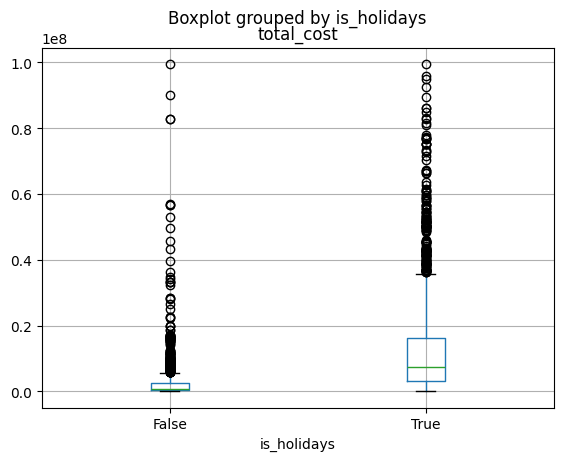

In [ ]:
train.boxplot(column="total_cost", by="is_holidays")

In [ ]:
# one hot encoding
for col in features_col:
    train_test_df = pd.get_dummies(train_test_df, columns=[col], prefix=[col])
    train = pd.get_dummies(train, columns=[col], prefix=[col])

In [ ]:
train_test_df.shape

(6410, 60)

In [ ]:
train_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6410 entries, 0 to 1600
Data columns (total 60 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   ID                                                    6410 non-null   object 
 1   country                                               6410 non-null   object 
 2   age_group                                             6410 non-null   object 
 3   total_female                                          6410 non-null   float64
 4   total_male                                            6410 non-null   float64
 5   tour_arrangement                                      6410 non-null   bool   
 6   package_transport_int                                 6410 non-null   bool   
 7   package_accomodation                                  6410 non-null   bool   
 8   package_food                                          6410 non-

In [ ]:
train_test_df["total_cost"].head()

,total_cost
0,674602.5
1,3214906.5
2,3315000.0
3,7790250.0
4,1657500.0


In [ ]:
train_test_df["total_cost"] = train_test_df["total_cost"].apply(lambda x: x/ 2400 if x is not None else None)

<Axes: xlabel='total_cost', ylabel='Density'>

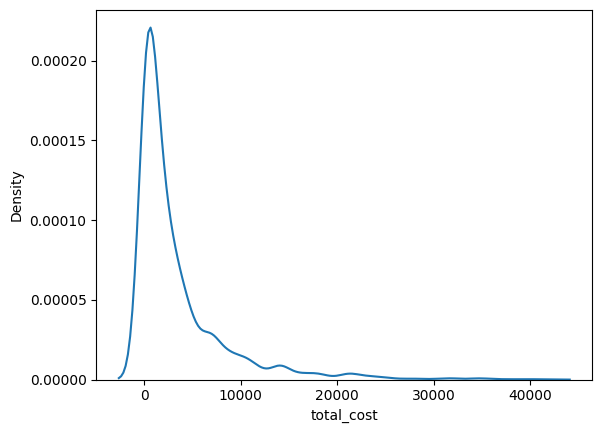

In [ ]:
# plot kde total_cost
sns.kdeplot(data=train_test_df, x="total_cost")


In [ ]:
# drop ID
# catch test ID
test_id = train_test_df[train_test_df["total_cost"].isna()]["ID"]



train_test_df.drop(columns=["ID", ], inplace=True)
train.drop(columns=["ID"], inplace=True)

In [ ]:
train_test_df["total_people"] = train_test_df["total_female"] + train_test_df["total_male"]
train["total_people"] = train["total_female"] + train["total_male"]

# total night
train_test_df["total_night"] = train_test_df["night_mainland"] + train_test_df["night_zanzibar"]
train["total_night"] = train["night_mainland"] + train["night_zanzibar"]

pack_col = [col for col in train_test_df.columns if "package" in col]
train_test_df["total_package"] = train_test_df[pack_col].sum(axis=1) * train_test_df["total_people"]
train["total_package"] = train[pack_col].sum(axis=1) * train["total_people"]
#total package


# as int
train_test_df["total_people"] = train_test_df["total_people"].astype(int)
train_test_df["total_night"] = train_test_df["total_night"].astype(int)
train_test_df["night_mainland"] = train_test_df["night_mainland"].astype(int)
train_test_df["night_mainland"] = train_test_df["night_mainland"].astype(int)


<Axes: xlabel='total_people', ylabel='total_cost'>

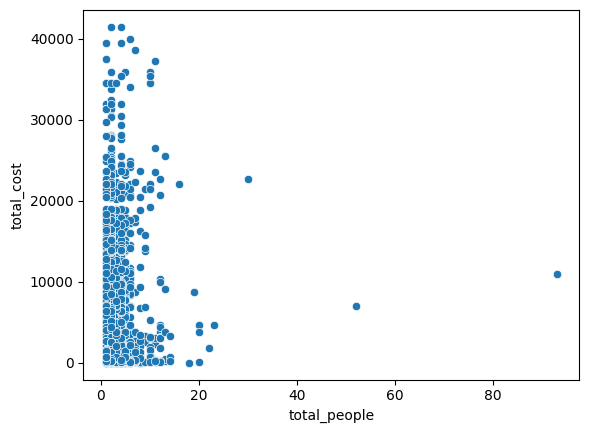

In [ ]:
## scatter plot for total_package and total cost
sns.scatterplot(data=train_test_df[~ train_test_df["total_package"].isna() ], x="total_people", y="total_cost")

In [ ]:
train_test_df[~ train_test_df["total_cost"].isna()]["total_cost"].describe()

,total_cost
count,4809.000000
mean,3380.995324
std,5093.709688
min,20.416667
25%,338.406250
50%,1415.781250
75%,4143.750000
max,41472.031250


,total_cost
count,4809.000000
mean,3380.995324
std,5093.709688
min,20.416667
25%,338.406250
50%,1415.781250
75%,4143.750000
max,41472.031250


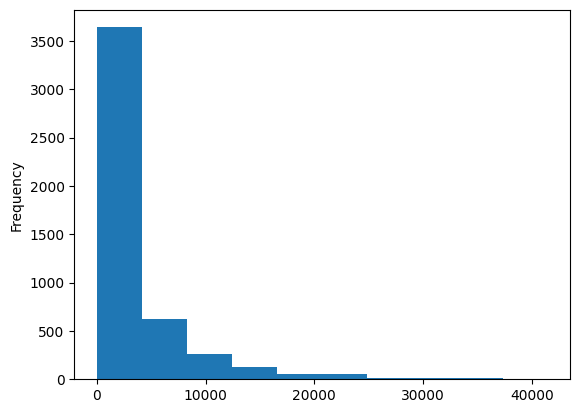

In [ ]:
train_test_df[~ train_test_df["total_cost"].isna()].sort_values(by="total_cost")["total_cost"].plot(kind="hist")


train_test_df[~ train_test_df["total_cost"].isna()].sort_values(by="total_cost")["total_cost"].describe()

<Axes: >

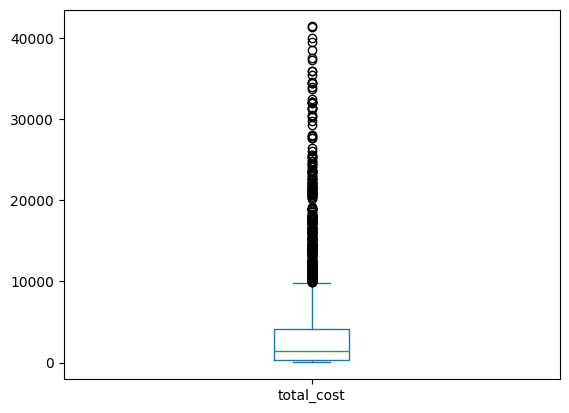

In [ ]:
train_test_df[~ train_test_df["total_cost"].isna()].sort_values(by="total_cost")["total_cost"].plot(kind="box")

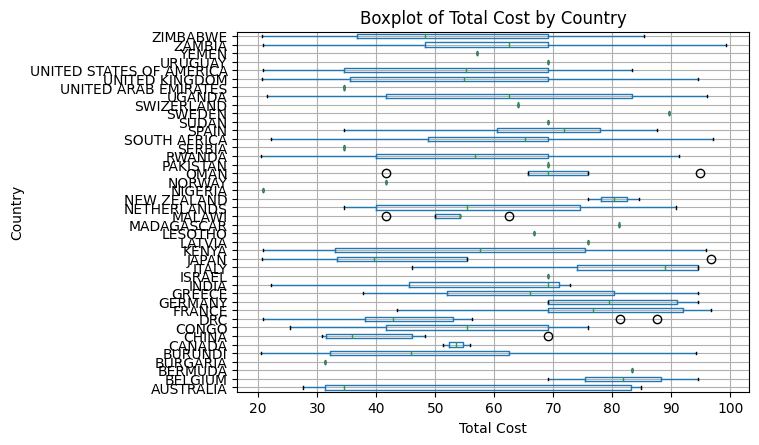

In [ ]:
# Filter the data
filtered_data = train_test_df[(~train_test_df["total_cost"].isna()) & (train_test_df["total_cost"] < 100)]

# Plot boxplot for total_cost by country
filtered_data.boxplot(column="total_cost", by="country", vert=False)

# Add labels and title
plt.title("Boxplot of Total Cost by Country")
plt.suptitle("")  # Remove the default "Boxplot grouped by country" title
plt.xlabel("Total Cost")
plt.ylabel("Country")
plt.show()

<Axes: xlabel='country'>

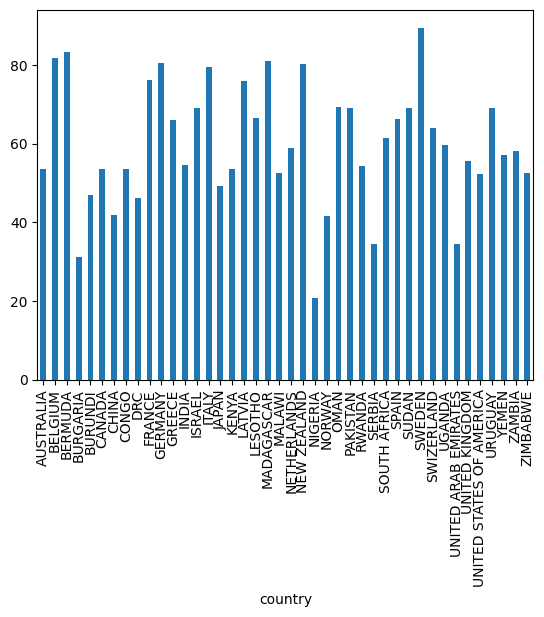

In [ ]:
filtered_data.groupby("country")["total_cost"].mean().plot(kind="bar")

In [ ]:
filtered_data.groupby("country")["total_cost"].mean()

,total_cost
country,
AUSTRALIA,53.710863
BELGIUM,81.808958
BERMUDA,83.333333
BURGARIA,31.250000
BURUNDI,47.023649
CANADA,53.541667
CHINA,41.845312
CONGO,53.506250
DRC,46.104818


In [ ]:
## multi aggregation on filtered data
filtered_data.groupby("country")["total_cost"].agg(["mean", "median", "std", "count"])


,mean,median,std,count
country,,,,
AUSTRALIA,53.710863,34.531250,28.223793,7
BELGIUM,81.808958,81.808958,18.026214,2
BERMUDA,83.333333,83.333333,NaN,1
BURGARIA,31.250000,31.250000,NaN,1
BURUNDI,47.023649,45.833333,19.072096,37
CANADA,53.541667,53.541667,3.240906,2
CHINA,41.845312,35.877083,14.936953,6
CONGO,53.506250,55.416667,20.490308,5
DRC,46.104818,42.916667,18.363765,16


In [ ]:
train_test_df = train_test_df[
    ((train_test_df["poorest_country"]) &
    (~train_test_df["total_cost"].isna()) &
    (train_test_df["total_cost"] < 100)) |
    (train_test_df["total_cost"] >= 100) |
    (train_test_df["total_cost"].isna())
]

# Check the shape of the filtered DataFrame
train_test_df.shape

(6182, 61)

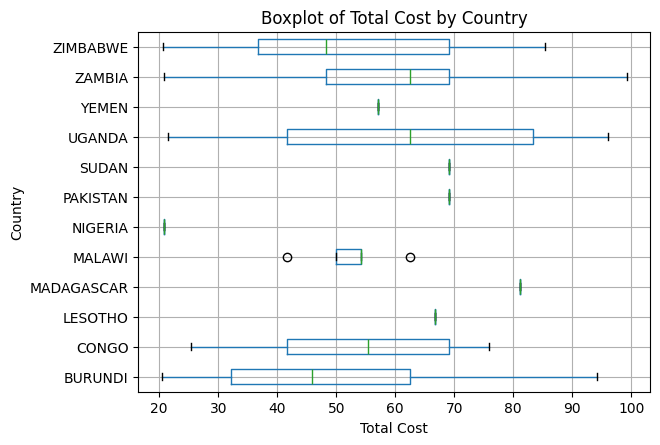

In [ ]:
# Filter the data
filtered_data = train_test_df[(~train_test_df["total_cost"].isna()) & (train_test_df["total_cost"] < 100)]

# Plot boxplot for total_cost by country
filtered_data.boxplot(column="total_cost", by="country", vert=False)

# Add labels and title
plt.title("Boxplot of Total Cost by Country")
plt.suptitle("")  # Remove the default "Boxplot grouped by country" title
plt.xlabel("Total Cost")
plt.ylabel("Country")
plt.show()

In [ ]:
## multi aggregation on filtered data
filtered_data.groupby("country")["total_cost"].agg(["mean", "median", "std", "count"])


,mean,median,std,count
country,,,,
BURUNDI,47.023649,45.833333,19.072096,37
CONGO,53.506250,55.416667,20.490308,5
LESOTHO,66.666667,66.666667,NaN,1
MADAGASCAR,81.062500,81.062500,NaN,1
MALAWI,52.604167,54.166667,5.866191,8
NIGERIA,20.833333,20.833333,NaN,1
PAKISTAN,69.062500,69.062500,NaN,1
SUDAN,69.062500,69.062500,NaN,1
UGANDA,59.759606,62.500000,21.595430,69


In [ ]:
filtered_data = train_test_df[(~train_test_df["total_cost"].isna()) & (train_test_df["total_cost"] > 20000)]

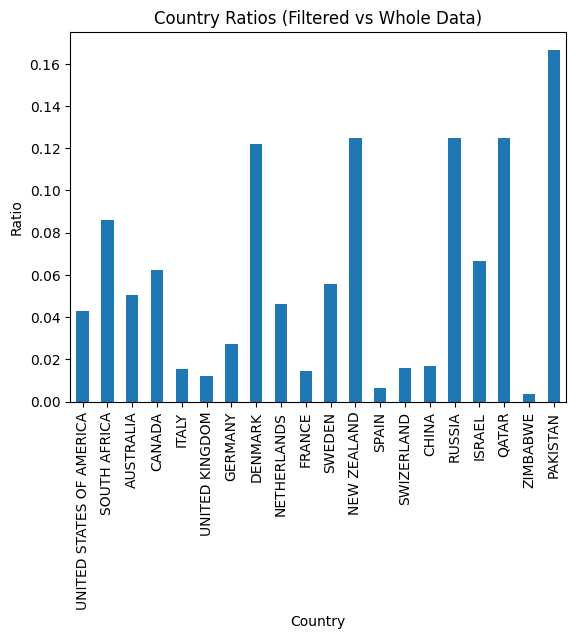

In [ ]:

# Get the frequency (count) of each country in both filtered and whole datasets
country_freq_filtered = filtered_data["country"].value_counts()
country_freq_whole = train_test_df[~train_test_df["total_cost"].isna()]["country"].value_counts()

# Ensure both series have the same countries, filling missing values with 0 for countries in the whole data but not in the filtered data
country_freq_filtered = country_freq_filtered.reindex(country_freq_whole.index, fill_value=0)

# Calculate the ratio for each country
country_ratios = country_freq_filtered / country_freq_whole

# Create a DataFrame to store the results
country_summary = pd.DataFrame({
    "Filtered Frequency": country_freq_filtered,
    "Whole Data Frequency": country_freq_whole,
    "Ratio": country_ratios
})

# Sort the DataFrame by 'Filtered Frequency' in descending order
country_summary = country_summary.sort_values(by="Filtered Frequency", ascending=False)

# Filter to keep only countries with non-zero filtered frequencies
country_summary = country_summary[country_summary["Filtered Frequency"] > 0]

# Plot the ratios as a bar chart
country_summary["Ratio"].plot(kind="bar")

# Add labels and title to the plot
plt.xlabel("Country")
plt.ylabel("Ratio")
plt.title("Country Ratios (Filtered vs Whole Data)")
plt.xticks(rotation=90)  # Rotate country labels on x-axis for better readability
plt.show()


In [ ]:
country_summary.head(20)

,Filtered Frequency,Whole Data Frequency,Ratio
country,,,
UNITED STATES OF AMERICA,29,677,0.042836
SOUTH AFRICA,19,221,0.085973
AUSTRALIA,9,179,0.050279
CANADA,7,112,0.062500
ITALY,6,389,0.015424
UNITED KINGDOM,6,496,0.012097
GERMANY,6,219,0.027397
DENMARK,5,41,0.121951
NETHERLANDS,5,108,0.046296


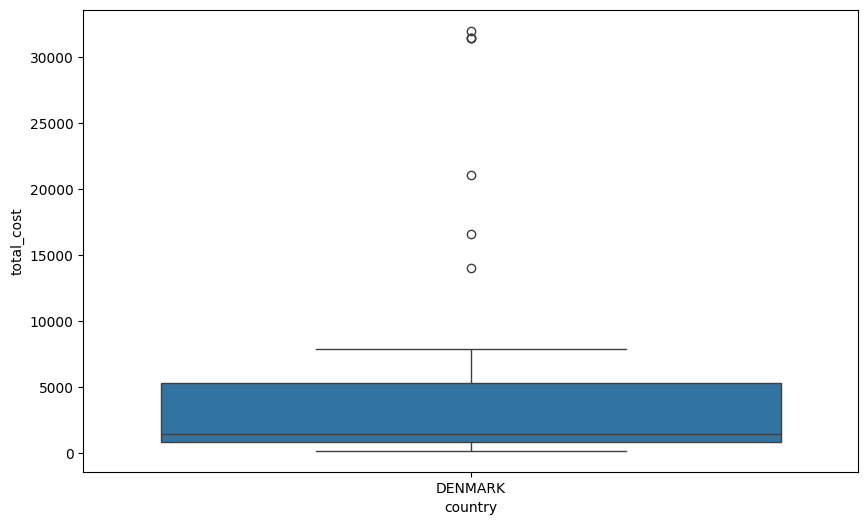

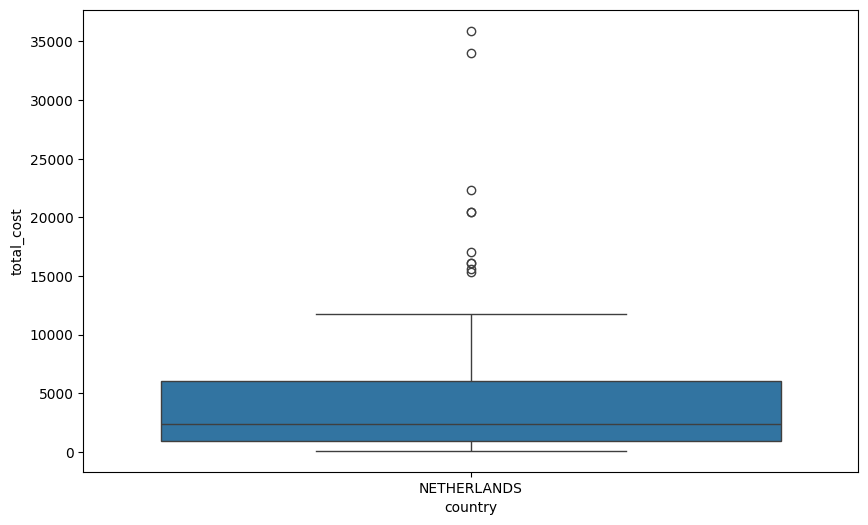

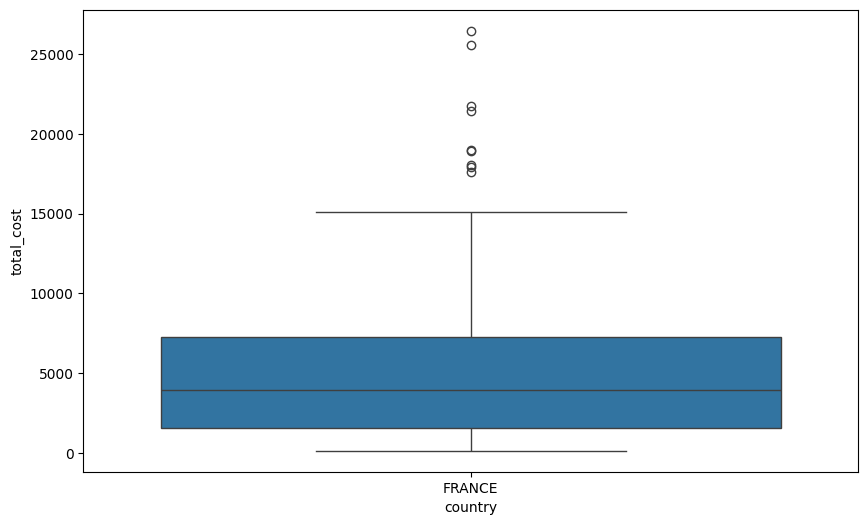

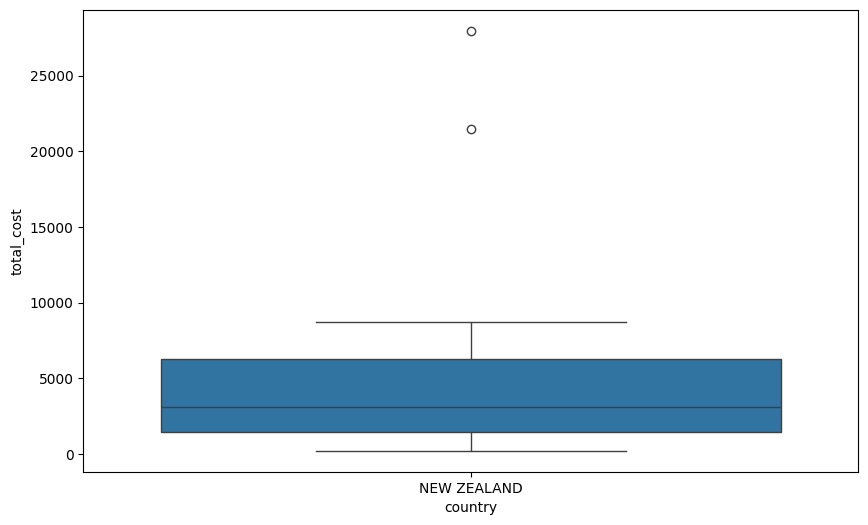

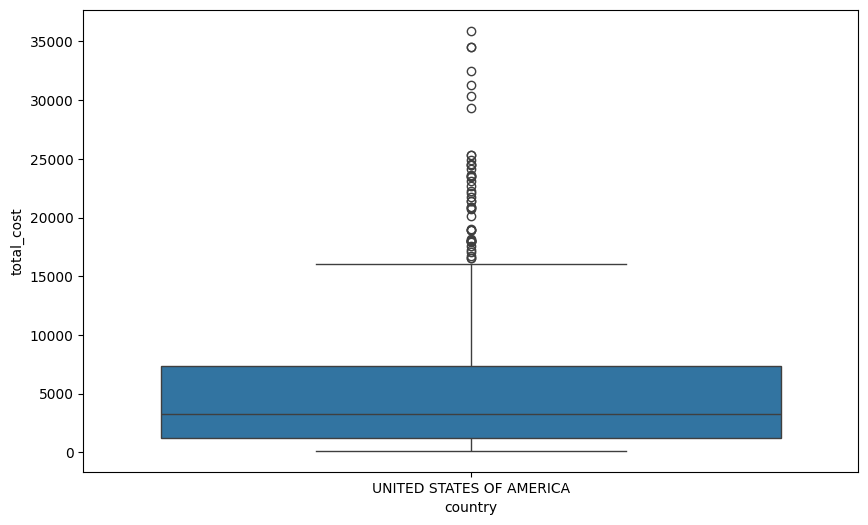

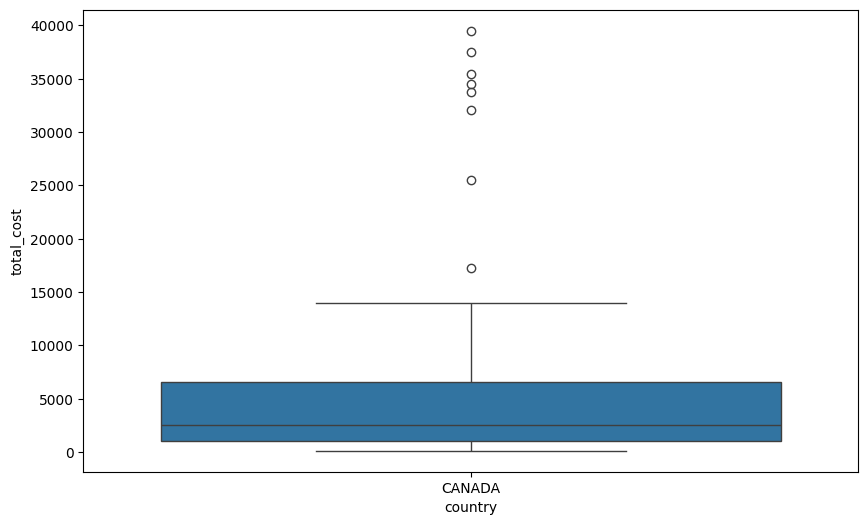

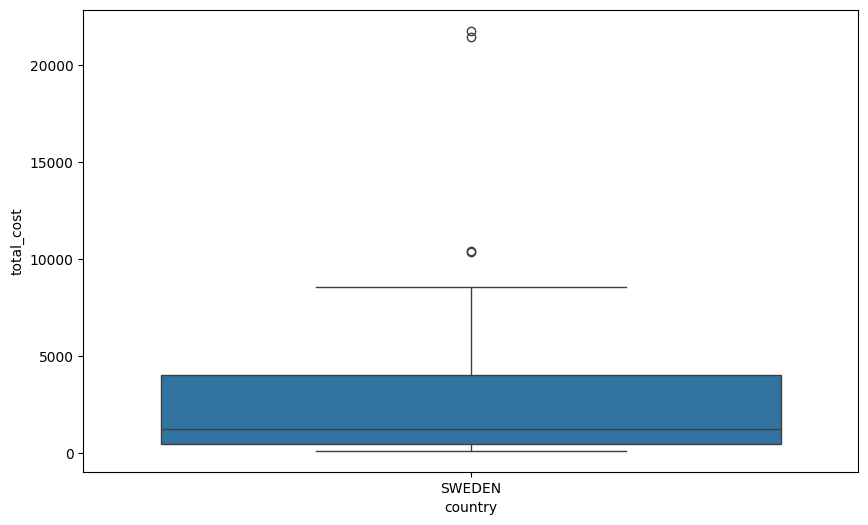

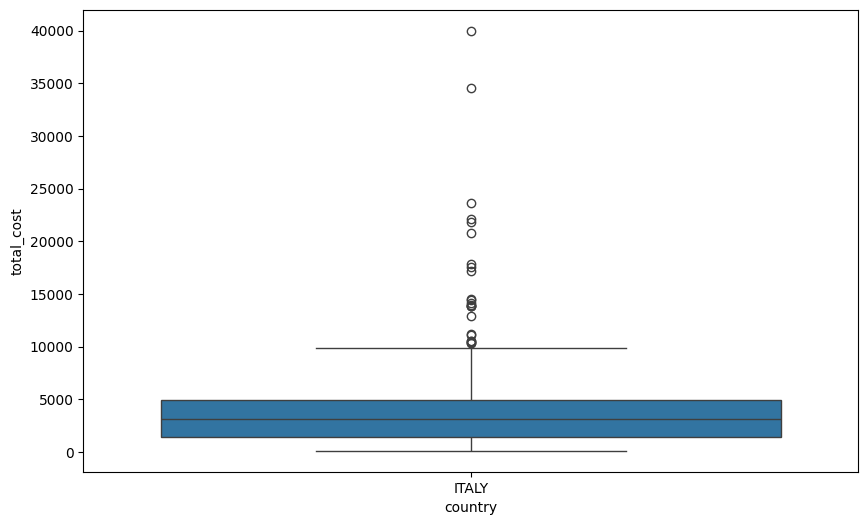

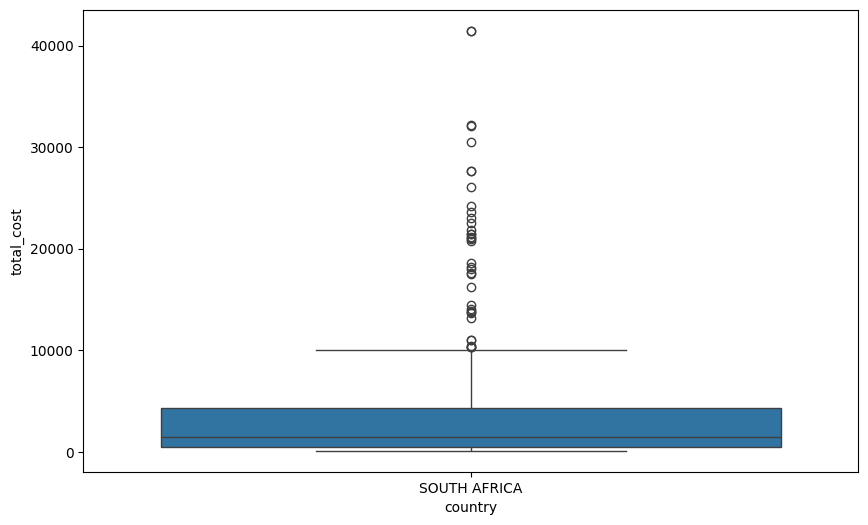

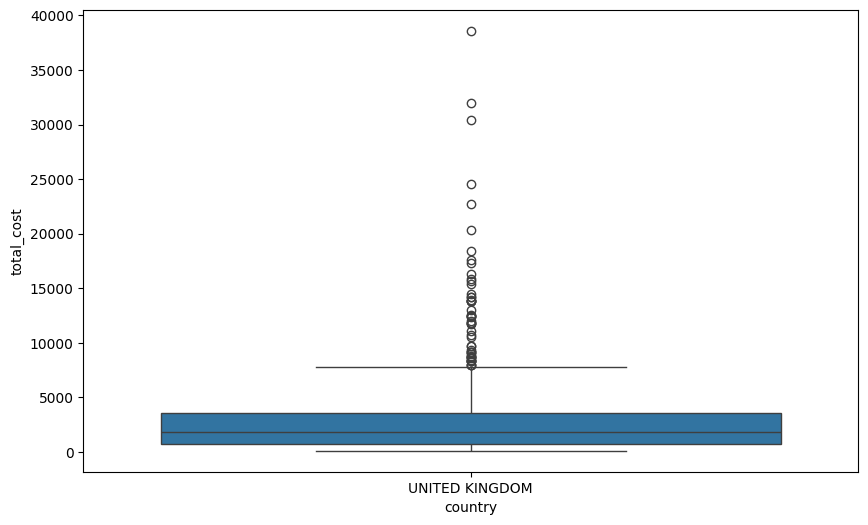

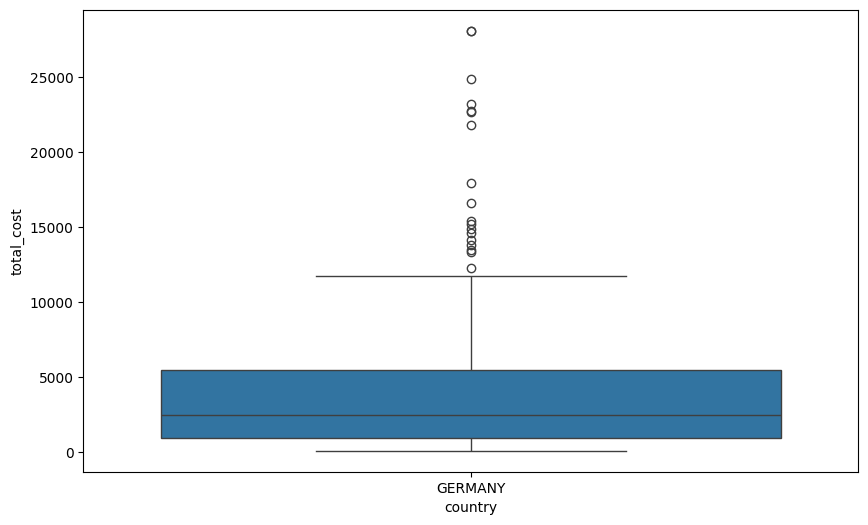

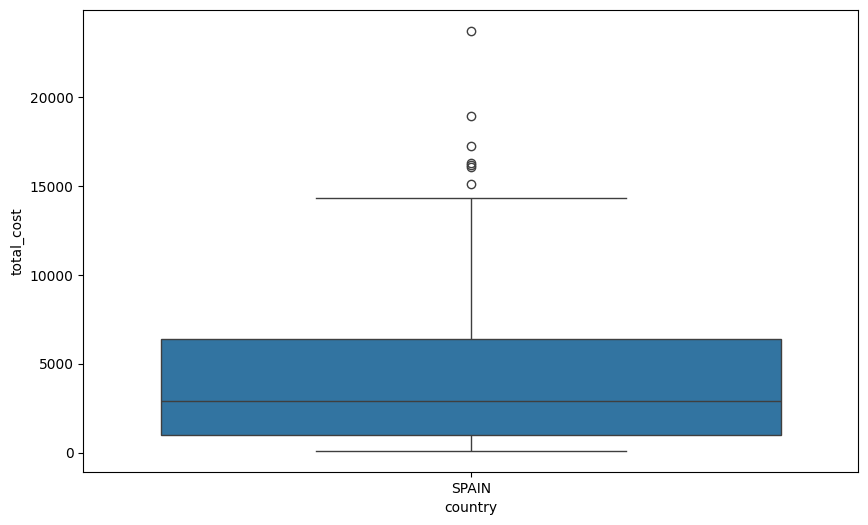

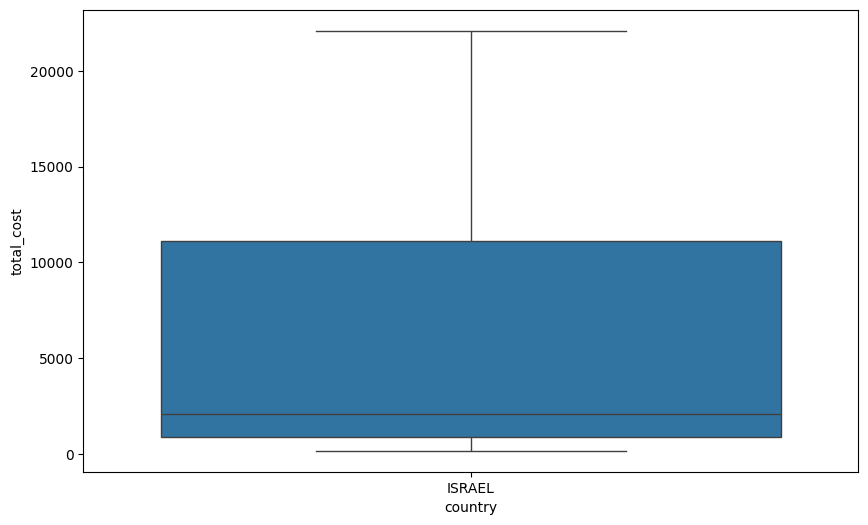

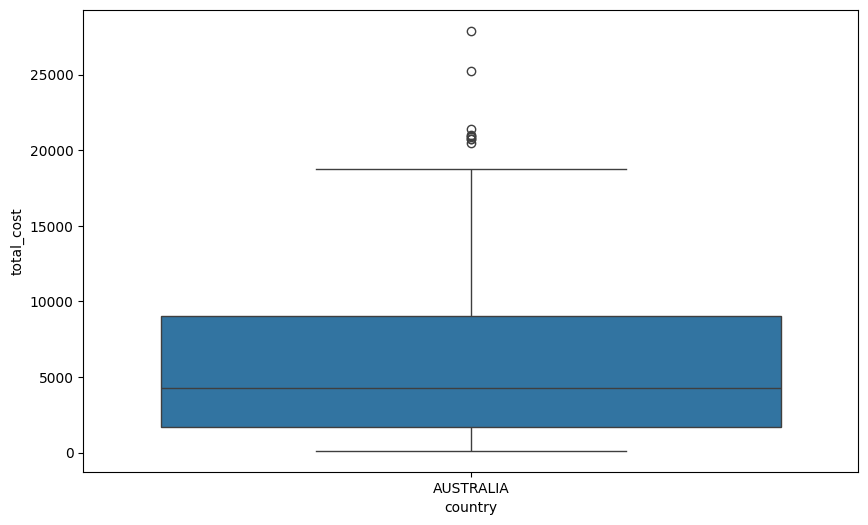

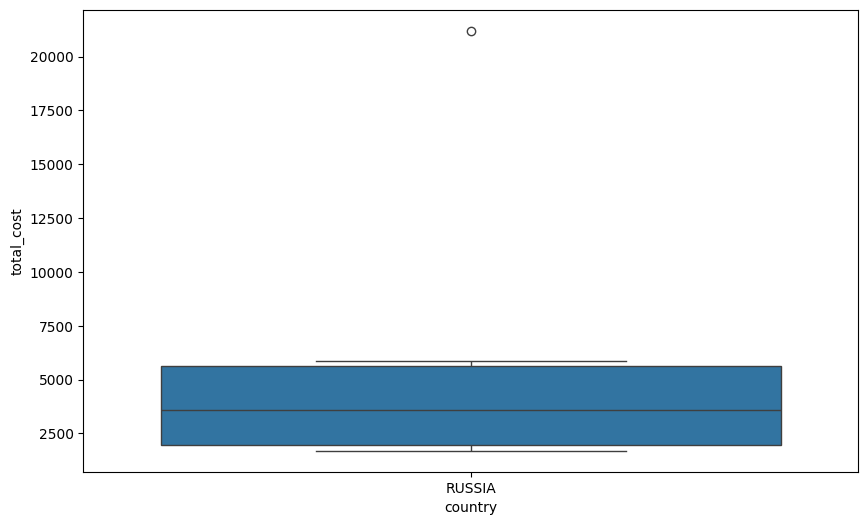

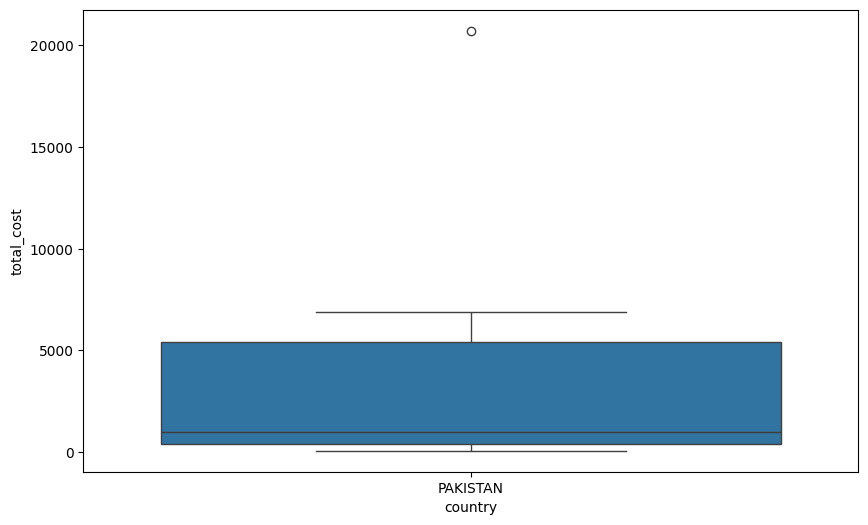

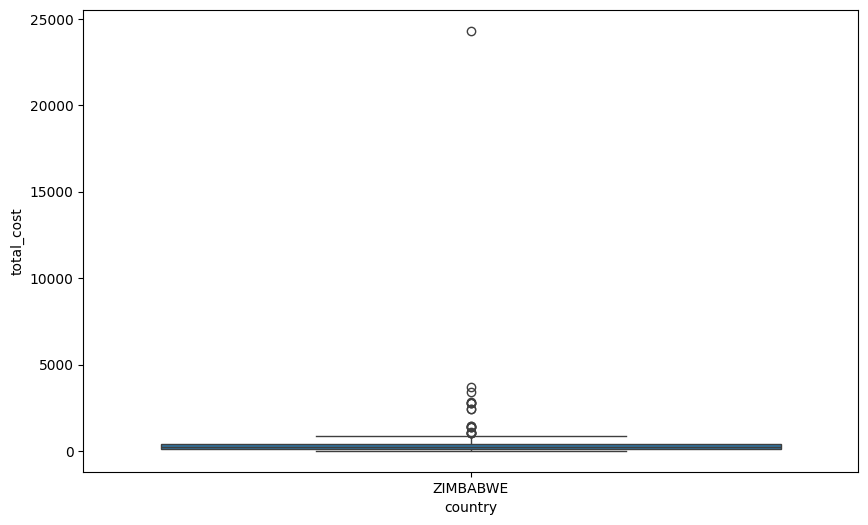

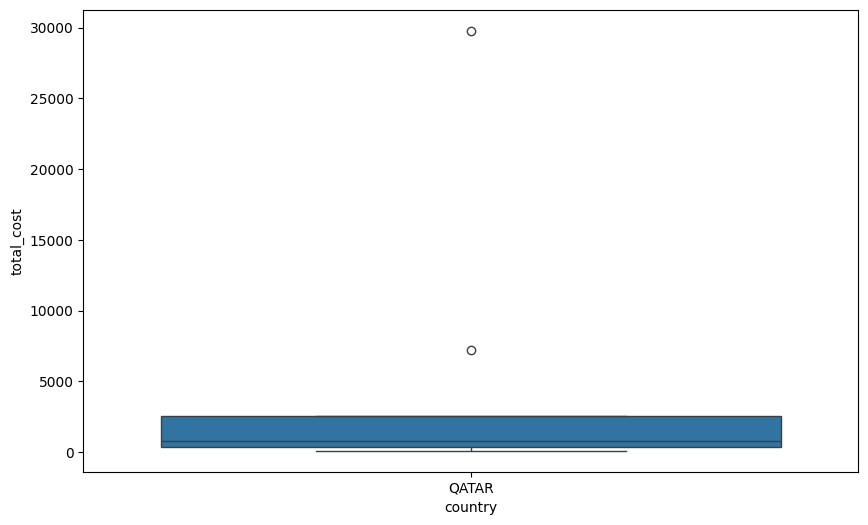

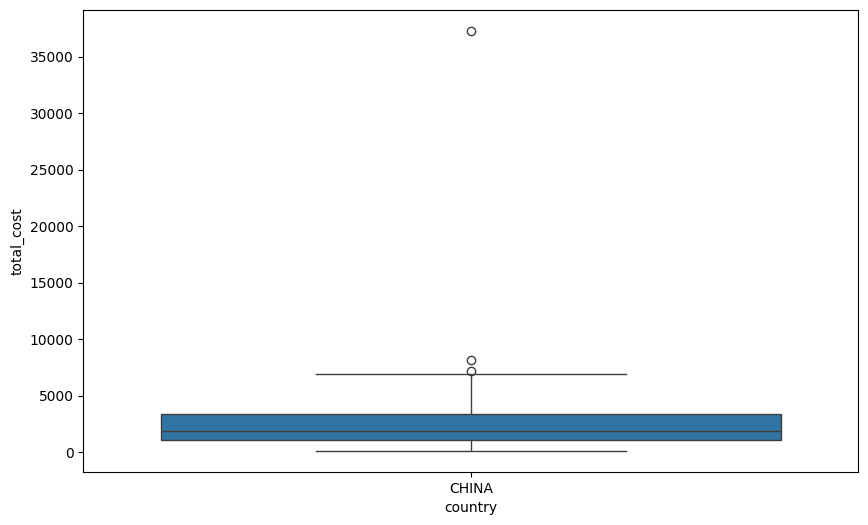

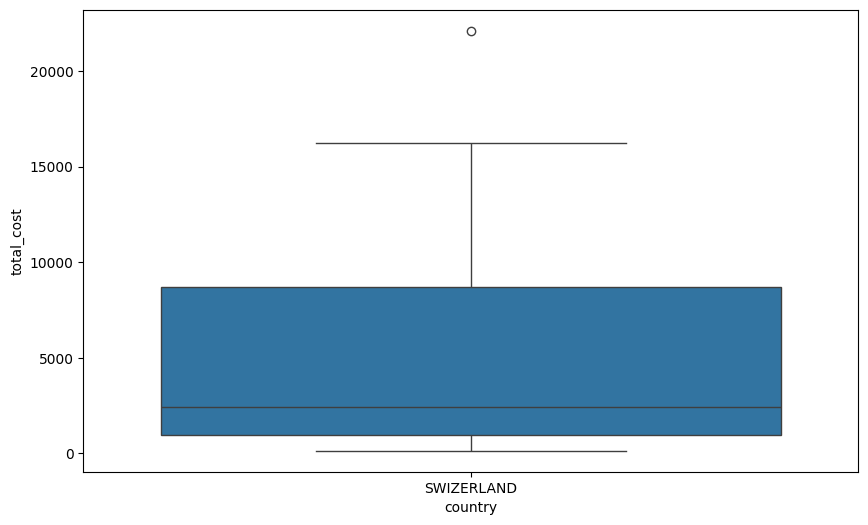

In [ ]:
# for counrty in filtered_data["country"] plot boxplot for each countries

for country in filtered_data["country"].unique():
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=train_test_df[train_test_df["country"] == country], x="country", y="total_cost")

In [ ]:
print(train_test_df.shape)
train_test_df = train_test_df[(train_test_df["total_cost"] <= 20_000) | (train_test_df["total_cost"].isna())]

train_test_df.shape

(6182, 61)


(6074, 61)

In [ ]:
train_test_df.head()

,country,age_group,total_female,total_male,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,...,info_source_others,most_impressing_ Wildlife,most_impressing_Excellent Experience,most_impressing_Friendly People,most_impressing_Good service,most_impressing_No comments,most_impressing_Satisfies and Hope Come Back,"most_impressing_Wonderful Country, Landscape, Nature",total_night,total_package
0,SWIZERLAND,45-64,1.0,1.0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,13,0.0
1,UNITED KINGDOM,25-44,1.0,0.0,False,False,False,False,False,False,...,True,False,False,False,False,False,False,True,21,0.0
2,UNITED KINGDOM,25-44,0.0,1.0,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,32,0.0
3,UNITED KINGDOM,25-44,1.0,1.0,True,False,True,True,True,True,...,False,False,False,True,False,False,False,False,11,10.0
4,CHINA,1-24,1.0,0.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,11,0.0


<Axes: >

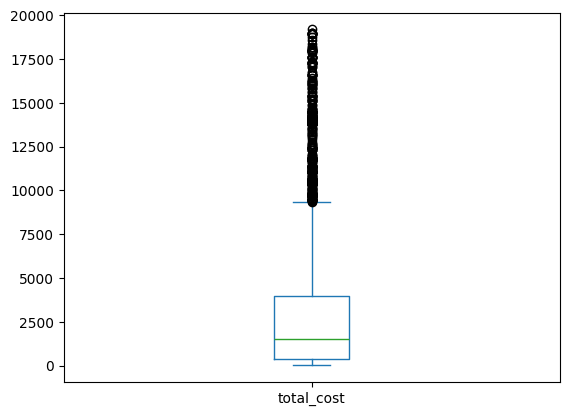

In [ ]:
train_test_df["total_cost"].plot(kind="box")

In [ ]:
# label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in train_test_df.select_dtypes(include="object"):
    train_test_df[col] = le.fit_transform(train_test_df[col])
    train[col] = le.fit_transform(train[col])

In [ ]:
train_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6074 entries, 0 to 1600
Data columns (total 61 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   country                                               6074 non-null   int64  
 1   age_group                                             6074 non-null   int64  
 2   total_female                                          6074 non-null   float64
 3   total_male                                            6074 non-null   float64
 4   tour_arrangement                                      6074 non-null   bool   
 5   package_transport_int                                 6074 non-null   bool   
 6   package_accomodation                                  6074 non-null   bool   
 7   package_food                                          6074 non-null   bool   
 8   package_transport_tz                                  6074 non-

<Axes: ylabel='Density'>

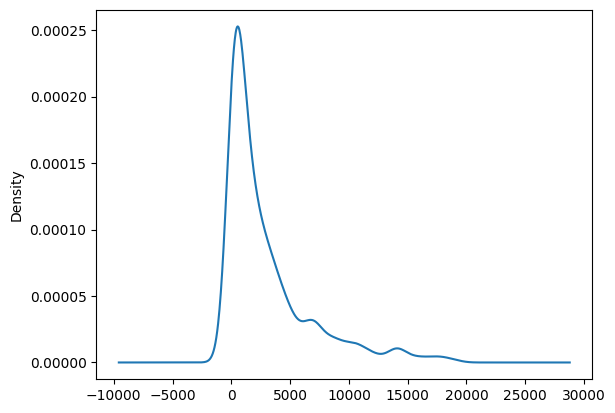

In [ ]:
train_test_df["total_cost"].plot(kind="kde")

<Axes: ylabel='Density'>

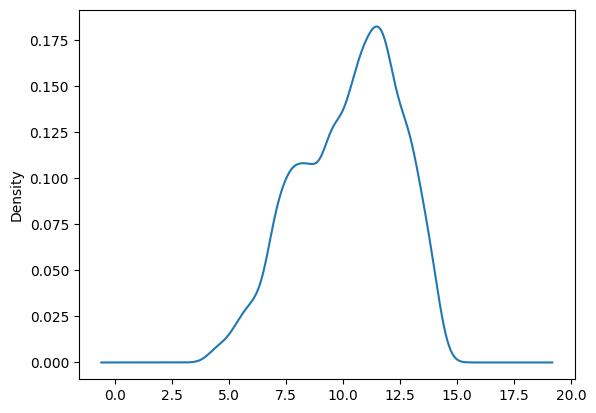

In [ ]:
(np.log2(train_test_df["total_cost"])).plot(kind="kde")

In [ ]:
train_test_df["total_cost"] = train_test_df["total_cost"].apply(lambda x: x*2400 if x is not None else None)

In [ ]:
train = train_test_df[train_test_df["total_cost"].notna()]
test = train_test_df[train_test_df["total_cost"].isna()].drop(columns=["total_cost"])

# asint


In [ ]:
X, y = train.drop(columns=["total_cost"]), train["total_cost"]

In [ ]:
# create training and testing vars
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.25, random_state = 42)

y_train_log2 = np.log2(y_train)


print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(3354, 60) (3354,)
(1119, 60) (1119,)


In [ ]:
! pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.2 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
predictions = []
for i in range(10):
    ct=CatBoostRegressor(iterations=1000,
                    loss_function='MAE',
                    logging_level='Silent',
                    depth = i
                    )
    ct.fit(X_train, y_train)
    preds = ct.predict(X_test)
    # preds = 2**preds
    predictions.append(preds)
    preds = np.mean(predictions, axis = 0)

In [ ]:

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, preds)

print('mea = {}'.format(mae))

mea = 3835241.6729191276


In [ ]:
# predict
y_pred = ct.predict(test)
# y_pred = 2**y_pred
sub_df = pd.DataFrame({'ID': test_id, 'total_cost': y_pred})

In [ ]:
## save to
from datetime import datetime
current_time = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
sub_df.to_csv(FILE_PATH + "submission_" + current_time + "__outlier_detected.csv", index=False)


Text(0.5, 0, 'Importance')

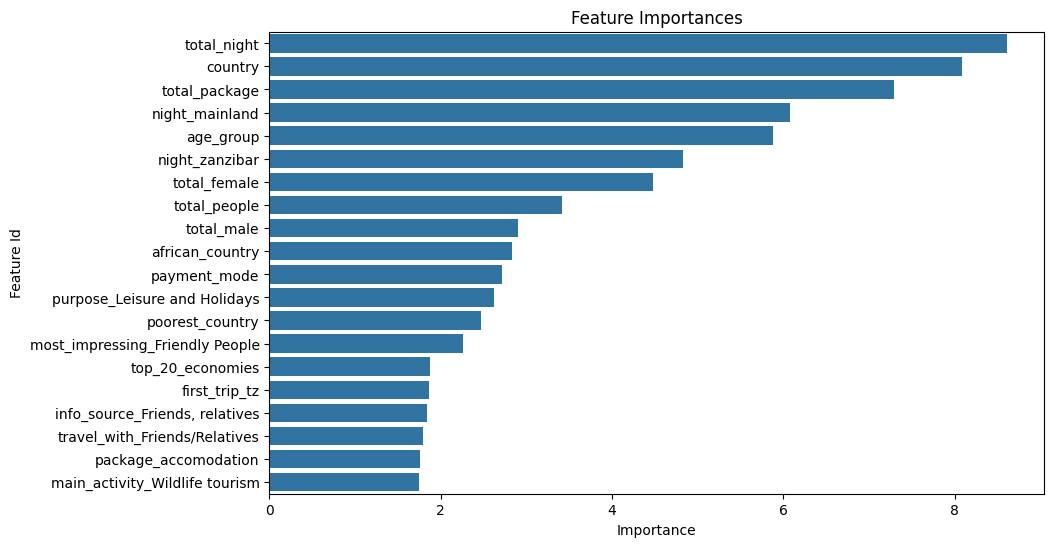

In [ ]:
# feature importances
feature_importances = ct.get_feature_importance(prettified=True)
feature_importances
# plot barchart
plt.figure(figsize=(10, 6))
sns.barplot(x="Importances", y="Feature Id", data=feature_importances.head(20))
plt.title("Feature Importances")
plt.xlabel("Importance")

In [ ]:
sub_df.head()

,ID,total_cost
0,tour_1,2.375022e+07
1,tour_100,3.560132e+06
2,tour_1001,1.402583e+07
3,tour_1006,2.353538e+06
4,tour_1009,2.061614e+07
